In [15]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
data=pd.read_csv('graph.csv')
#data=data["Sunspots"]
scaler=MinMaxScaler(feature_range=(0,1))
column=['X']
data=scaler.fit_transform(data[column]).flatten()
data

array([0.58317946, 0.62840121, 0.63104902, 0.68452775, 0.77727067,
       0.79486465, 0.79378462, 0.76918789, 0.75939797, 0.73866843,
       0.70508309, 0.7013901 , 0.72037766, 0.65324182, 0.61073755,
       0.58913702, 0.57272759, 0.58074069, 0.50928474, 0.50646274,
       0.53123367, 0.5114448 , 0.49068042, 0.50541755, 0.48350347,
       0.49433857, 0.52433544, 0.50221231, 0.46162422, 0.47831237,
       0.46040484, 0.51165383, 0.49844964, 0.44504059, 0.38020416,
       0.40528865, 0.4005853 , 0.36992649, 0.29233878, 0.30118803,
       0.3707278 , 0.3865798 , 0.43563391, 0.44786259, 0.42068773,
       0.40981779, 0.39650908, 0.3533777 , 0.38894889, 0.32324147,
       0.38288681, 0.40487057, 0.29320977, 0.35707069, 0.35734941,
       0.37581437, 0.34755949, 0.31373027, 0.32048915, 0.36240114,
       0.35916106, 0.3849075 , 0.38382747, 0.36375989, 0.39807686,
       0.42061805, 0.43971013, 0.36477023, 0.33278751, 0.41542696,
       0.38138871, 0.36825419, 0.37302721, 0.40417378, 0.42810

In [17]:
n=len(data)
split=int(n*0.9)
train_data=data[range(split)]
test_data=data[split:]


In [18]:
len(train_data)

198

In [19]:
hidden_units=50
time_steps=2
input_shape=(time_steps,1)
y_ind=np.arange(time_steps,len(train_data),time_steps)
y_train=train_data[y_ind]
x_train=train_data[range(len(y_train)*time_steps)]
x_train=np.reshape(x_train,(len(y_train),time_steps,1))

y_ind=np.arange(time_steps,len(test_data),time_steps)
y_test=test_data[y_ind]
x_test=train_data[range(len(y_test)*time_steps)]
x_test=np.reshape(x_test,(len(y_test),time_steps,1))


In [20]:
print(x_train.shape)
print(y_train.shape)

(98, 2, 1)
(98,)


In [21]:
model=Sequential()

model.add(LSTM(hidden_units,return_sequences=True,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
4/4 [==============================] - 5s 13ms/step - loss: 0.2354
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2146
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1922
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1656
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1365
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1036
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0702
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0443
Epoch 11/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0412
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0416
Epoch 13/50
4/4 [==============================] - 0s 6ms/step - loss: 0

In [23]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

1/1 [==============================] - 0s 18ms/step


In [24]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [25]:
print_error(y_train,y_test,train_pred,test_pred)

Train RMSE: 0.062 RMSE
Test RMSE: 0.217 RMSE


In [26]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(20, 5), dpi=100)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

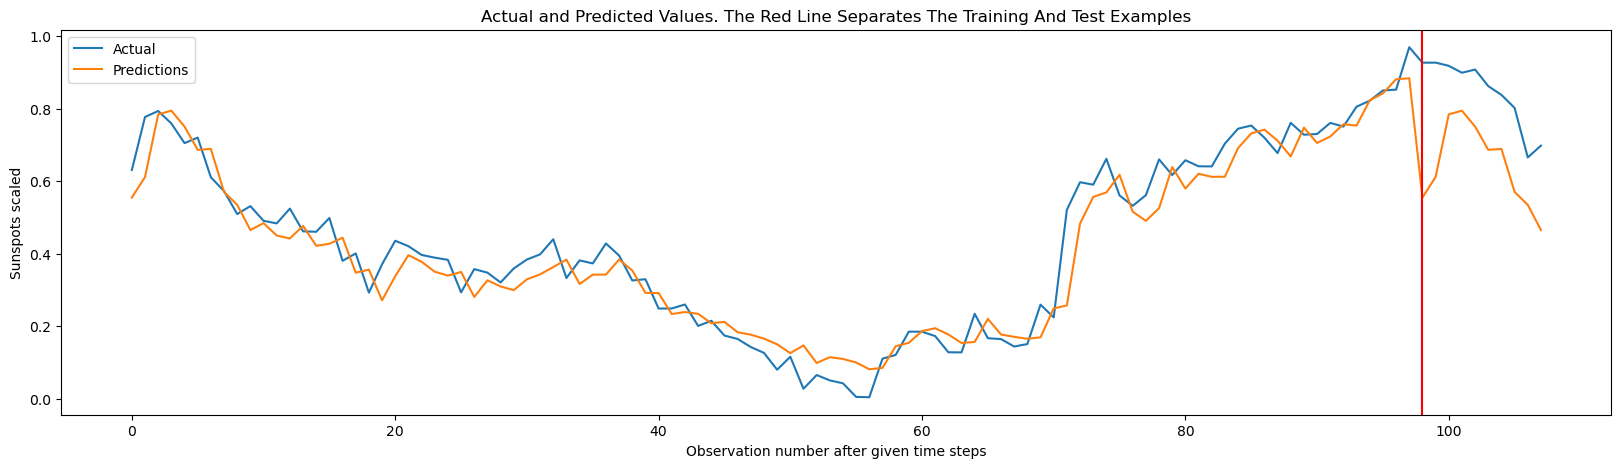

In [27]:
plot_result(y_train,y_test,train_pred,test_pred)

In [28]:
graph=pd.read_csv('graph.csv')
fig=px.line(graph,x=graph['Y'],y=graph['X'],title='Graph')
fig.show()